In [30]:
import pandas as pd
import random
import os
import numpy as np
from tqdm import tqdm_notebook
from collections import Counter

from gensim.models import Word2Vec
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 7.0)

In [31]:
path = 'TagScore_1.csv'
df = pd.read_csv(path)
df.columns
df.head()

,Tags,Score
0,java<android<security<hash<passwords,3
1,android<android-manifest<android-securityexcep...,4
2,ios<objective-c<security<encryption<sha1,3
3,android<broadcastreceiver<google-play-services...,0
4,ios<objective-c<security<encryption<sha1,3


In [32]:
tags = list(df['Tags'].unique())
all_tags = []
for tag in tqdm_notebook(tags):
    all_tags += tag.split('<')

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_34932\352278747.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for tag in tqdm_notebook(tags):


  0%|          | 0/17155 [00:00<?, ?it/s]

# What are the most commonly used tags?

In [33]:
count_tags = Counter(all_tags)
tags = pd.DataFrame([list(count_tags.keys()), list(count_tags.values())])
tags = tags.transpose()
tags.columns = ['tag', 'count']
tags = tags.sort_values(by='count', ascending=False)

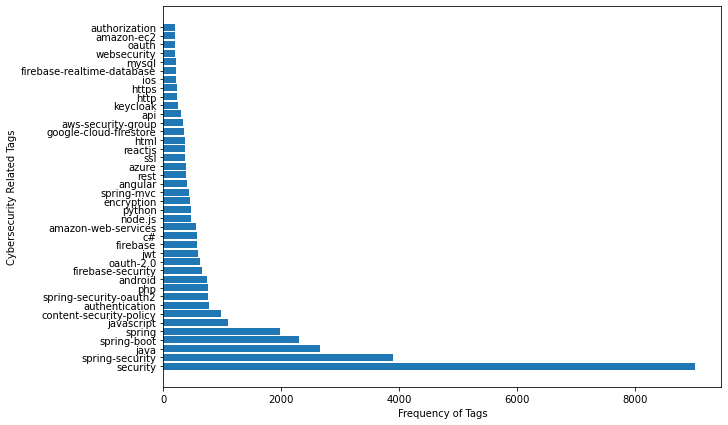

In [34]:
plt.barh(list(tags['tag'])[:40], list(tags['count'])[:40])
plt.ylabel('Cybersecurity Related Tags')
plt.xlabel('Frequency of Tags')
plt.show()

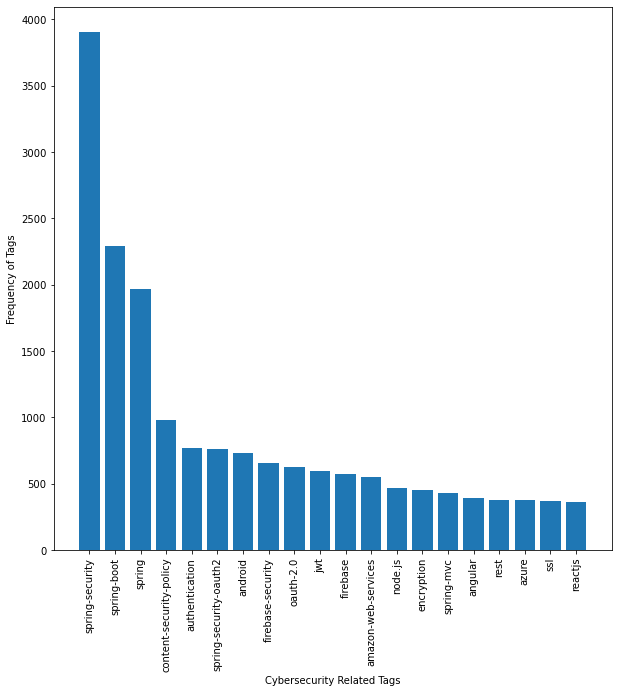

In [12]:
top20 = ['spring-security', 'spring-boot', 'spring', 'content-security-policy', 'authentication', 'spring-security-oauth2', 'android', 'firebase-security', 'oauth-2.0', 'jwt', 'firebase', 'amazon-web-services', 'node.js', 'encryption', 'spring-mvc', 'angular', 'rest', 'azure', 'ssl', 'reactjs']
x = []
y = []
for tag in top20:
    index = list(tags['tag']).index(tag)
    x.append(tag)
    y.append(list(tags['count'])[index])
plt.bar(x, y)

plt.xticks(rotation='vertical')
plt.ylabel('Frequency of Tags')
plt.xlabel('Cybersecurity Related Tags')
#plt.show()
plt.savefig("rq1.pdf", bbox_inches='tight')

# The popularity of programming language tags used in Cybersecurity

In [35]:
cyber = ['python', 'javascript', 'php', 'c', 'c++', 'c#', 'html', 'java']
x = []
y = []
for tag in cyber:
    index = list(tags['tag']).index(tag)
    x.append(tag)
    y.append(list(tags['count'])[index])

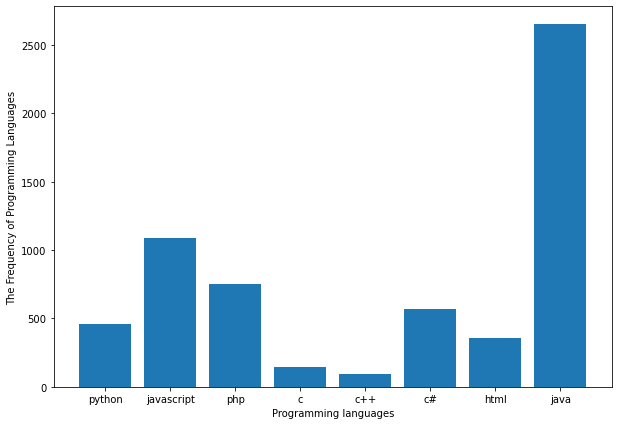

In [36]:
plt.bar(x, y)
plt.ylabel('The Frequency of Programming Languages')
plt.xlabel('Programming languages')
#plt.show()
plt.savefig("rq2.pdf", bbox_inches='tight')

# Most questions contain several tags

In [15]:
tags = list(df['Tags'].unique())
num_tags = []
for tag_ in tqdm_notebook(tags):
    num_tags.append(len(tag_.split('<')))
num_tags = Counter(num_tags)

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_34932\3458266964.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for tag_ in tqdm_notebook(tags):


  0%|          | 0/17155 [00:00<?, ?it/s]

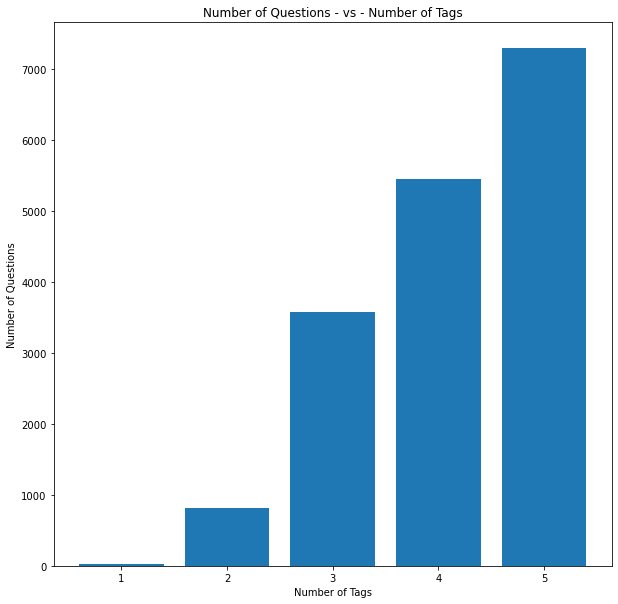

In [17]:
plt.bar(list(num_tags.keys()), list(num_tags.values()))
plt.xlabel('Number of Tags')
plt.ylabel('Number of Questions')
plt.title('Number of Questions - vs - Number of Tags')
plt.show()

# What tags get highest/lowest rating in Questions?

In [18]:
tag_rate = df[['Tags', 'Score']].drop_duplicates().reset_index(drop=True)
tag_rate.head()

,Tags,Score
0,java<android<security<hash<passwords,3
1,android<android-manifest<android-securityexcep...,4
2,ios<objective-c<security<encryption<sha1,3
3,android<broadcastreceiver<google-play-services...,0
4,javascript<html<reactjs<security<fetch,1


In [19]:
tagRate = {}
for i in tqdm_notebook(range(len(tag_rate['Tags']))):
    for tag in tag_rate['Tags'][i].split('<'):
        try:
            tagRate[tag].append(tag_rate['Score'][i])
        except Exception:
            tagRate[tag] = [tag_rate['Score'][i]]

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_34932\1500077867.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(len(tag_rate['Tags']))):


  0%|          | 0/19587 [00:00<?, ?it/s]

In [20]:
tagRateAvg = {}
for key in list(tagRate.keys()):
    tagRateAvg[key] = np.average(tagRate[key])

In [21]:
tagRateAvg = pd.DataFrame([list(tagRateAvg.keys()), list(tagRateAvg.values())])
tagRateAvg = tagRateAvg.transpose()
tagRateAvg.columns = ['Tags', 'Score']
tagRateAvg = tagRateAvg.sort_values('Score')

Text(0, 0.5, 'Tag')

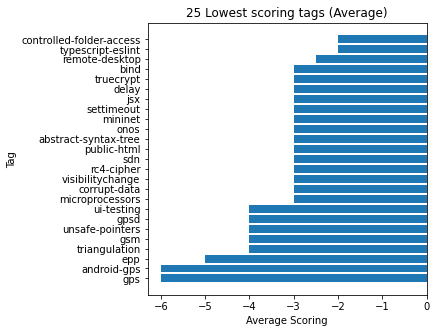

In [17]:
plt.barh(list(tagRateAvg['Tags'])[:25], list(tagRateAvg['Score'])[:25])
plt.xlabel('Average Scoring')
plt.title('25 Lowest scoring tags (Average)')
plt.ylabel('Tag')

Text(0, 0.5, 'Tag')

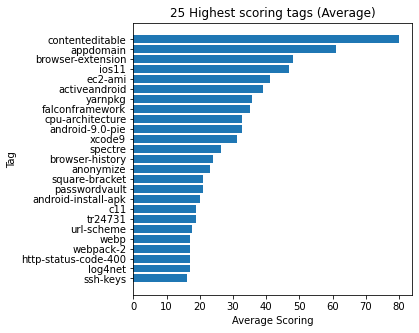

In [18]:
plt.barh(list(tagRateAvg['Tags'])[-25:], list(tagRateAvg['Score'])[-25:])
plt.xlabel('Average Scoring')
plt.title('25 Highest scoring tags (Average)')
plt.ylabel('Tag')

# What is the score for the programming language in the question

In [22]:
cyber = ['python', 'javascript', 'php', 'c', 'c++', 'c#', 'html', 'java']
x = []
y = []
for tag in cyber:
    index = list(tagRateAvg['Tags']).index(tag)
    x.append(tag)
    y.append(list(tagRateAvg['Score'])[index])

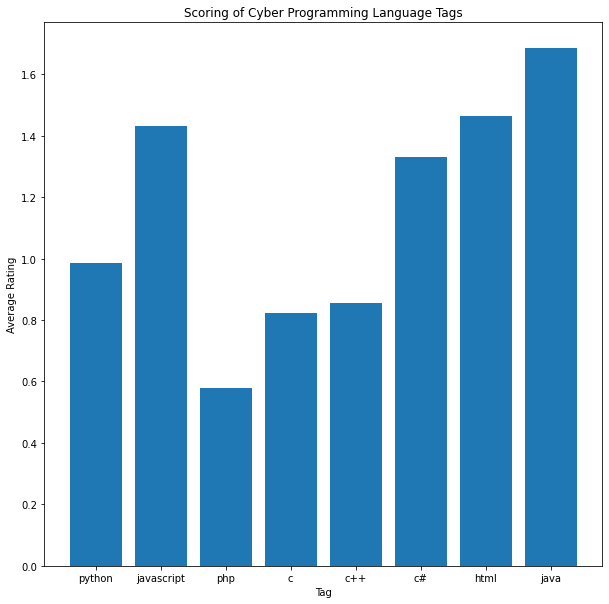

In [23]:
plt.bar(x, y)
plt.ylabel('Average Rating')
plt.xlabel('Tag')
plt.title('Scoring of Cyber Programming Language Tags')
plt.show()

Text(0.5, 1.0, 'c#')

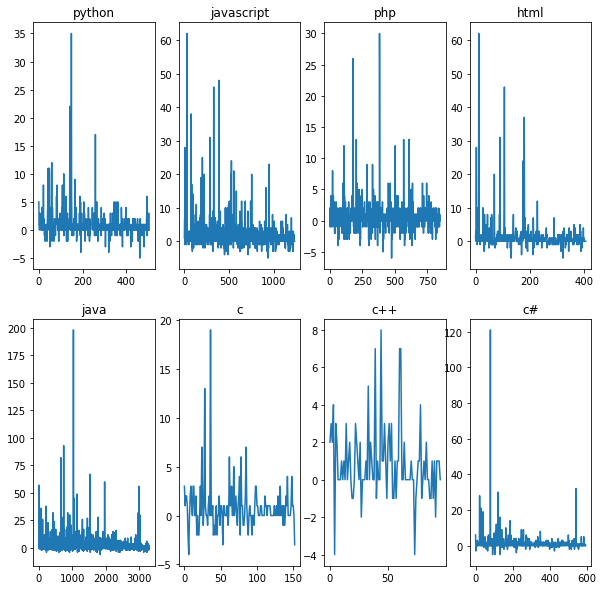

In [73]:
fig, ax = plt.subplots(2, 4)
ax[0][0].plot(tagRate['python'])
ax[0][0].set_title('python')

ax[0][1].plot(tagRate['javascript'])
ax[0][1].set_title('javascript')

ax[0][2].plot(tagRate['php'])
ax[0][2].set_title('php')

ax[0][3].plot(tagRate['html'])
ax[0][3].set_title('html')

ax[1][0].plot(tagRate['java'])
ax[1][0].set_title('java')

ax[1][1].plot(tagRate['c'])
ax[1][1].set_title('c')

ax[1][2].plot(tagRate['c++'])
ax[1][2].set_title('c++')

ax[1][3].plot(tagRate['c#'])
ax[1][3].set_title('c#')

In [5]:
tags = []
for tag in list(df['Tags']):
    tags.append(tag.split('<'))

In [10]:
embedding = Word2Vec(tags, sg=1, vector_size=256, min_count=1)

In [17]:
X = embedding[embedding.wv.key_to_index]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

TypeError: 'Word2Vec' object is not subscriptable